# Evaluation of all models

**Comparison of all models**:

**ML:**
- Logistic Regression
- Random Forest
- Support Vector Machine
- Deep Neural Network (Multilayer Perceptron)
- Naive Bayes
- K-Nearest Neighbors

**LLMs:**
- GPT (OpenAI)
- Gemini
- Gemma
- Claude
- DeepSeek
- Grok

**Prompt Strategies:**
- Simple Prompt
- Class Definitions Prompt
- Profiled Simple Prompt
- Few Shot Prompt
- Vignette Prompt
- Chain-of-Thought Prompt

**Unification Approaches:**
- Creation of new input data for ML models
- Proportion of Votes (Pov)
- OR Unification of best LLMs and best ML models

# 0 Imports

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [34]:
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", low_memory = False)

## ML Models

In [35]:
y_pred_lr = pd.read_csv("01_ML/y_pred_ML/y_pred_lr.csv", sep = ",")
y_pred_rf = pd.read_csv("01_ML/y_pred_ML/y_pred_rf.csv", sep = ",")
y_pred_svc = pd.read_csv("01_ML/y_pred_ML/y_pred_svc.csv", sep = ",")
y_pred_dnn = pd.read_csv("01_ML/y_pred_ML/y_pred_dnn.csv", sep = ",")
y_pred_knn = pd.read_csv("01_ML/y_pred_ML/y_pred_knn.csv", sep = ",")
y_pred_nb = pd.read_csv("01_ML/y_pred_ML/y_pred_nb.csv", sep = ",")

## LLMs

In [36]:
y_pred_GPT_o3_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_simple_prompt.csv", sep = ",")
y_pred_GPT_o3_class_definitions_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_class_definitions_prompt.csv", sep = ",")
y_pred_GPT_o3_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_profiled_simple_prompt.csv", sep = ",")
y_pred_GPT_o3_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_few_shot_prompt.csv", sep = ",")
y_pred_GPT_o3_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_vignette_prompt.csv", sep = ",")
y_pred_GPT_o3_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_cot_prompt.csv", sep = ",")

In [37]:
y_pred_Gemini_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_simple_prompt.csv", sep = ",")
y_pred_Gemini_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_class_definitions_prompt.csv", sep = ",")
y_pred_Gemini_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_profiled_simple_prompt.csv", sep = ",")
y_pred_Gemini_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt.csv", sep = ",")
y_pred_Gemini_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_vignette_prompt.csv", sep = ",")
y_pred_Gemini_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_cot_prompt.csv", sep = ",")

In [38]:
y_pred_Gemma_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_simple_prompt.csv", sep = ",")
y_pred_Gemma_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_class_definitions_prompt.csv", sep = ",")
y_pred_Gemma_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_profiled_simple_prompt.csv", sep = ",")
y_pred_Gemma_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_few_shot_prompt.csv", sep = ",")
y_pred_Gemma_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_vignette_prompt.csv", sep = ",")
y_pred_Gemma_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_cot_prompt.csv", sep = ",")

In [39]:
y_pred_Claude_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_simple_prompt.csv", sep = ",")
y_pred_Claude_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_class_definitions_prompt.csv", sep = ",")
y_pred_Claude_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/Claude/y_pred_claude_profiled_simple_prompt.csv", sep = ",")
y_pred_Claude_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_few_shot_prompt.csv", sep = ",")
y_pred_Claude_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_vignette_prompt.csv", sep = ",")
y_pred_Claude_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_cot_prompt.csv", sep = ",")

In [40]:
y_pred_DeepSeek_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_simple_prompt.csv", sep = ",")
y_pred_DeepSeek_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_class_definitions_prompt.csv", sep = ",")
y_pred_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_profiled_simple_prompt.csv", sep = ",")
y_pred_DeepSeek_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt.csv", sep = ",")
y_pred_DeepSeek_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_vignette_prompt.csv", sep = ",")
y_pred_DeepSeek_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_cot_prompt.csv", sep = ",")

In [41]:
y_pred_Grok_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_simple_prompt.csv", sep = ",")
y_pred_Grok_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_class_definitions_prompt.csv", sep = ",")
y_pred_Grok_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_profiled_simple_prompt.csv", sep = ",")
y_pred_Grok_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt.csv", sep = ",")
y_pred_Grok_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_vignette_prompt.csv", sep = ",")
y_pred_Grok_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_cot_prompt.csv", sep = ",")

## Unification Approaches

#### Creation of new input data for ML models

In [42]:
y_pred_new_input_nb = pd.read_csv("03_Unification/y_pred_unification/new_input/y_pred_new_input_nb.csv", sep =",")

#### Proportion of Votes (PoV)

In [43]:
y_pred_pov_all_models = pd.read_csv("03_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_all_models.csv", sep =",")
y_pred_pov_ml_votes = pd.read_csv("03_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_ml_models.csv", sep =",")
y_pred_pov_llm_votes = pd.read_csv("03_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_llm_models.csv", sep =",")
y_pred_pov_simple_votes = pd.read_csv(
    "03_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_simple_models.csv", sep =",")
y_pred_pov_class_definitions_votes = pd.read_csv(
    "03_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_class_definitions_models.csv", sep =",")
y_pred_pov_profiled_simple_votes = pd.read_csv(
    "03_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_profiled_simple_models.csv", sep =",")
y_pred_pov_few_shot_votes = pd.read_csv(
    "03_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_few_shot_models.csv", sep =",")
y_pred_pov_vignette_votes = pd.read_csv(
    "03_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_vignette_models.csv", sep =",")
y_pred_pov_cot_votes = pd.read_csv("03_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_cot_models.csv", sep =",")

#### OR Unification of best LLMs and best ML models

In [44]:
y_pred_best_LLM_or_best_ML = pd.read_csv(
    "03_Unification/y_pred_unification/OR_unification/y_pred_best_LLM_or_best_ML.csv", sep =",")

# 1 Metrics

In [45]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [46]:
# calculate metrics for all models
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = recall_score(y_test, y_pred, average = "macro")
    micro_f1 = recall_score(y_test, y_pred, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel().tolist()

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
    roc_auc = auc(fpr, tpr)

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "roc_auc": roc_auc
    }

    return metrics

## Metrics: ML Models

In [47]:
# calculate metrics for all models
metrics_lr = calculate_metrics(y_test, y_pred_lr)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_svc = calculate_metrics(y_test, y_pred_svc)
metrics_dnn = calculate_metrics(y_test, y_pred_dnn)
metrics_knn = calculate_metrics(y_test, y_pred_knn)
metrics_nb = calculate_metrics(y_test, y_pred_nb)

## Metrics: LLMs

In [48]:
metrics_GPT_o3_simple_prompt = calculate_metrics(y_test, y_pred_GPT_o3_simple_prompt["y_pred"])
metrics_GPT_o3_class_definitions_prompt = calculate_metrics(y_test, y_pred_GPT_o3_class_definitions_prompt["y_pred"])
metrics_GPT_o3_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT_o3_profiled_simple_prompt["y_pred"])
metrics_GPT_o3_vignette_prompt = calculate_metrics(y_test, y_pred_GPT_o3_vignette_prompt["y_pred"])
metrics_GPT_o3_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT_o3_few_shot_prompt["y_pred"])
metrics_GPT_o3_cot_prompt = calculate_metrics(y_test, y_pred_GPT_o3_cot_prompt["y_pred"])

In [49]:
metrics_Gemini_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_simple_prompt["y_pred"])
metrics_Gemini_class_def_prompt = calculate_metrics(y_test, y_pred_Gemini_class_def_prompt["y_pred"])
metrics_Gemini_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_profiled_simple_prompt["y_pred"])
metrics_Gemini_few_shot_prompt = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt["y_pred"])
metrics_Gemini_vignette_prompt = calculate_metrics(y_test, y_pred_Gemini_vignette_prompt["y_pred"])
metrics_Gemini_cot_prompt = calculate_metrics(y_test, y_pred_Gemini_cot_prompt["y_pred"])

In [50]:
metrics_Gemma_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_simple_prompt["y_pred"])
metrics_Gemma_class_def_prompt = calculate_metrics(y_test, y_pred_Gemma_class_def_prompt["y_pred"])
metrics_Gemma_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_profiled_simple_prompt["y_pred"])
metrics_Gemma_few_shot_prompt = calculate_metrics(y_test, y_pred_Gemma_few_shot_prompt["y_pred"])
metrics_Gemma_vignette_prompt = calculate_metrics(y_test, y_pred_Gemma_vignette_prompt["y_pred"])
metrics_Gemma_cot_prompt = calculate_metrics(y_test, y_pred_Gemma_cot_prompt["y_pred"])

In [51]:
metrics_Claude_simple_prompt = calculate_metrics(y_test, y_pred_Claude_simple_prompt["y_pred"])
metrics_Claude_class_def_prompt = calculate_metrics(y_test, y_pred_Claude_class_def_prompt["y_pred"])
metrics_Claude_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Claude_profiled_simple_prompt["y_pred"])
metrics_Claude_few_shot_prompt = calculate_metrics(y_test, y_pred_Claude_few_shot_prompt["y_pred"])
metrics_Claude_vignette_prompt = calculate_metrics(y_test, y_pred_Claude_vignette_prompt["y_pred"])
metrics_Claude_cot_prompt = calculate_metrics(y_test, y_pred_Claude_cot_prompt["y_pred"])

In [52]:
metrics_DeepSeek_simple_prompt = calculate_metrics(y_test, y_pred_DeepSeek_simple_prompt["y_pred"])
metrics_DeepSeek_class_def_prompt = calculate_metrics(y_test, y_pred_DeepSeek_class_def_prompt["y_pred"])
metrics_DeepSeek_profiled_simple_prompt = calculate_metrics(y_test, y_pred_DeepSeek_profiled_simple_prompt["y_pred"])
metrics_DeepSeek_few_shot_prompt = calculate_metrics(y_test, y_pred_DeepSeek_few_shot_prompt["y_pred"])
metrics_DeepSeek_vignette_prompt = calculate_metrics(y_test, y_pred_DeepSeek_vignette_prompt["y_pred"])
metrics_DeepSeek_cot_prompt = calculate_metrics(y_test, y_pred_DeepSeek_cot_prompt["y_pred"])

In [53]:
metrics_Grok_simple_prompt = calculate_metrics(y_test, y_pred_Grok_simple_prompt)
metrics_Grok_class_def_prompt = calculate_metrics(y_test, y_pred_Grok_class_def_prompt)
metrics_Grok_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Grok_profiled_simple_prompt)
metrics_Grok_few_shot_prompt = calculate_metrics(y_test, y_pred_Grok_few_shot_prompt)
metrics_Grok_vignette_prompt = calculate_metrics(y_test, y_pred_Grok_vignette_prompt)
metrics_Grok_cot_prompt = calculate_metrics(y_test, y_pred_Grok_cot_prompt["y_pred"])

## Metrics: Unification Approaches

In [54]:
metrics_new_input_nb = calculate_metrics(y_test, y_pred_new_input_nb["y_pred"])

In [55]:
metrics_pov_all_models = calculate_metrics(y_test, y_pred_pov_all_models["y_pred"])
metrics_pov_ml_votes = calculate_metrics(y_test, y_pred_pov_ml_votes["y_pred"])
metrics_pov_llm_votes = calculate_metrics(y_test, y_pred_pov_llm_votes["y_pred"])
metrics_pov_simple_votes = calculate_metrics(y_test, y_pred_pov_simple_votes["y_pred"])
metrics_pov_class_definitions_votes = calculate_metrics(y_test, y_pred_pov_class_definitions_votes["y_pred"])
metrics_pov_profiled_simple_votes = calculate_metrics(y_test, y_pred_pov_profiled_simple_votes["y_pred"])
metrics_pov_few_shot_votes = calculate_metrics(y_test, y_pred_pov_few_shot_votes["y_pred"])
metrics_pov_vignette_votes = calculate_metrics(y_test, y_pred_pov_vignette_votes["y_pred"])
metrics_pov_cot_votes = calculate_metrics(y_test, y_pred_pov_cot_votes["y_pred"])

In [56]:
metrics_best_LLM_or_best_ML = calculate_metrics(y_test, y_pred_best_LLM_or_best_ML["y_pred"])

# 2 Visualize Metrics

In [57]:
LLM_colors = [
    "#6F8F00", #GPT green
    "#CCB900", #Gemini yellow
    "#7EB5D6", #Gemma blue
    "#A51E37", #Claude red
    "#4A36C2", #DeepSeek purple
    "#EB7801", #Grok orange
]

ML_colors = [
    "#C3C3C3", # Logistic Regression grey
    "#875A00", # Random Forest brown
    "#076300", # Support Vector Machine dark green
    "#CF3400", # Deep Neural red
    "#03588C", # Naive Bayes blue
    "#8F00A8" # K-Nearest Neighbors purple
]

## ML Models

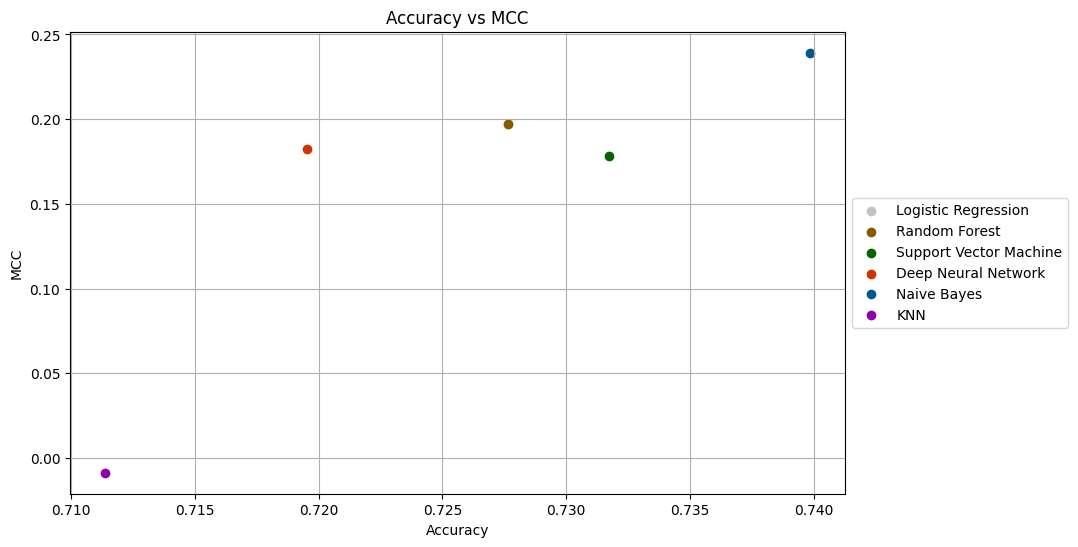

In [58]:
# plot accuracy (x-axis) and mcc (y-axis) for all models
plt.figure(figsize = (10, 6))

plt.scatter(metrics_lr["accuracy"], metrics_lr["mcc"], label = "Logistic Regression", color = ML_colors[0])
plt.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label = "Random Forest", color = ML_colors[1])
plt.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label = "Support Vector Machine", color = ML_colors[2])
plt.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label = "Deep Neural Network", color = ML_colors[3])
plt.scatter(metrics_nb["accuracy"], metrics_nb["mcc"], label = "Naive Bayes", color = ML_colors[4])
plt.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label = "KNN", color = ML_colors[5])

# plt.xlim(0, 1)
# plt.ylim(-1, 1)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_ML.png", dpi = 300, bbox_inches = "tight")

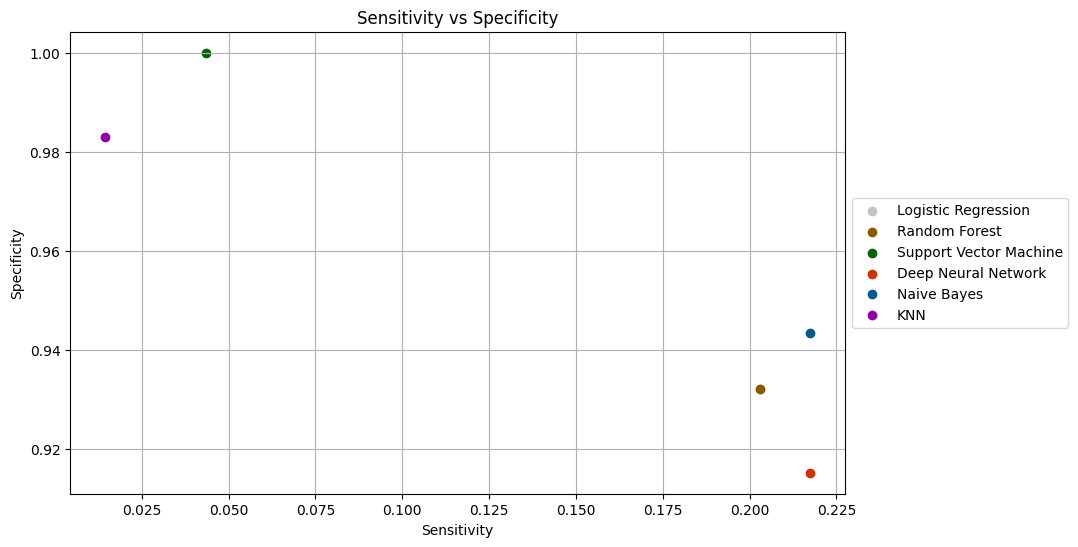

In [59]:
# sensitivity vs specificity
plt.figure(figsize = (10, 6))

plt.scatter(metrics_lr["sensitivity"], metrics_lr["specificity"], label = "Logistic Regression", color = ML_colors[0])
plt.scatter(metrics_rf["sensitivity"], metrics_rf["specificity"], label = "Random Forest", color = ML_colors[1])
plt.scatter(metrics_svc["sensitivity"], metrics_svc["specificity"], label = "Support Vector Machine", color = ML_colors[2])
plt.scatter(metrics_dnn["sensitivity"], metrics_dnn["specificity"], label = "Deep Neural Network", color = ML_colors[3])
plt.scatter(metrics_nb["sensitivity"], metrics_nb["specificity"], label = "Naive Bayes", color = ML_colors[4])
plt.scatter(metrics_knn["sensitivity"], metrics_knn["specificity"], label = "KNN", color = ML_colors[5])

# plt.xlim(0, 1)
# plt.ylim(0, 1)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/sensitivity_specificity_ML.png", dpi = 300, bbox_inches = "tight")

**Sensitivity** = Wie viel Prozent der predicted positives sind wirklich positiv. Wie viele der tatsächlich kranken Personen hat das Model erkannt?

**Specificity** = Wie viel Prozent der predicted negatives sind wirklich negativ. Wie viele der tatsächlich gesunden Personen hat das Model richtig ausgeschlossen (negativ predicted)?

## LLMs

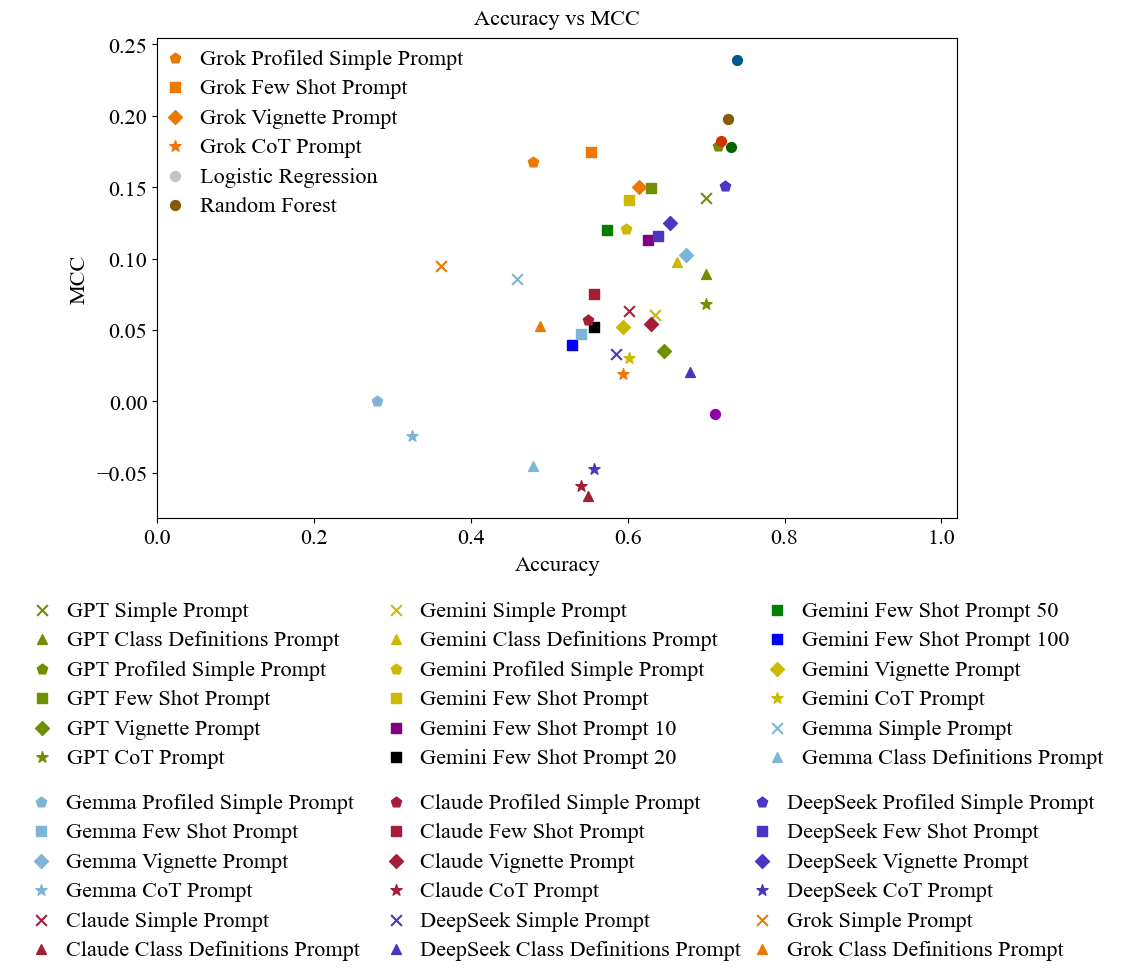

In [79]:
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 16

alpha = 0.8
fig = plt.figure(figsize = (10*alpha, 6*alpha))
ax = fig.add_axes([0, 0.13, 1, 1])

ax.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label="GPT Simple Prompt", color=LLM_colors[0], marker="x", s=60)
ax.scatter(metrics_GPT_o3_class_definitions_prompt["accuracy"], metrics_GPT_o3_class_definitions_prompt["mcc"], label="GPT Class Definitions Prompt", color=LLM_colors[0], marker="^", s=50)
ax.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label="GPT Profiled Simple Prompt", color=LLM_colors[0], marker="p", s=60)
ax.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label="GPT Few Shot Prompt", color=LLM_colors[0], marker="s", s=50)
ax.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label="GPT Vignette Prompt", color=LLM_colors[0], marker="D", s=50)
ax.scatter(metrics_GPT_o3_cot_prompt["accuracy"], metrics_GPT_o3_cot_prompt["mcc"], label="GPT CoT Prompt", color=LLM_colors[0], marker="*", s=70)

ax.scatter(metrics_Gemini_simple_prompt["accuracy"], metrics_Gemini_simple_prompt["mcc"], label="Gemini Simple Prompt", color=LLM_colors[1], marker="x", s=60)
ax.scatter(metrics_Gemini_class_def_prompt["accuracy"], metrics_Gemini_class_def_prompt["mcc"], label="Gemini Class Definitions Prompt", color=LLM_colors[1], marker="^", s=50)
ax.scatter(metrics_Gemini_profiled_simple_prompt["accuracy"], metrics_Gemini_profiled_simple_prompt["mcc"], label="Gemini Profiled Simple Prompt", color=LLM_colors[1], marker="p", s=60)
ax.scatter(metrics_Gemini_few_shot_prompt["accuracy"], metrics_Gemini_few_shot_prompt["mcc"], label="Gemini Few Shot Prompt", color=LLM_colors[1], marker="s", s=50)
ax.scatter(metrics_Gemini_vignette_prompt["accuracy"], metrics_Gemini_vignette_prompt["mcc"], label="Gemini Vignette Prompt", color=LLM_colors[1], marker="D", s=50)
ax.scatter(metrics_Gemini_cot_prompt["accuracy"], metrics_Gemini_cot_prompt["mcc"], label="Gemini CoT Prompt", color=LLM_colors[1], marker="*", s=70)

ax.scatter(metrics_Gemma_simple_prompt["accuracy"], metrics_Gemma_simple_prompt["mcc"], label="Gemma Simple Prompt", color=LLM_colors[2], marker="x", s=60)
ax.scatter(metrics_Gemma_class_def_prompt["accuracy"], metrics_Gemma_class_def_prompt["mcc"], label="Gemma Class Definitions Prompt", color=LLM_colors[2], marker="^", s=50)
ax.scatter(metrics_Gemma_profiled_simple_prompt["accuracy"], metrics_Gemma_profiled_simple_prompt["mcc"], label="Gemma Profiled Simple Prompt", color=LLM_colors[2], marker="p", s=60)
ax.scatter(metrics_Gemma_few_shot_prompt["accuracy"], metrics_Gemma_few_shot_prompt["mcc"], label="Gemma Few Shot Prompt", color=LLM_colors[2], marker="s", s=50)
ax.scatter(metrics_Gemma_vignette_prompt["accuracy"], metrics_Gemma_vignette_prompt["mcc"], label="Gemma Vignette Prompt", color=LLM_colors[2], marker="D", s=50)
ax.scatter(metrics_Gemma_cot_prompt["accuracy"], metrics_Gemma_cot_prompt["mcc"], label="Gemma CoT Prompt", color=LLM_colors[2], marker="*", s=70)

ax.scatter(metrics_Claude_simple_prompt["accuracy"], metrics_Claude_simple_prompt["mcc"], label="Claude Simple Prompt", color=LLM_colors[3], marker="x", s=60)
ax.scatter(metrics_Claude_class_def_prompt["accuracy"], metrics_Claude_class_def_prompt["mcc"], label="Claude Class Definitions Prompt", color=LLM_colors[3], marker="^", s=50)
ax.scatter(metrics_Claude_profiled_simple_prompt["accuracy"], metrics_Claude_profiled_simple_prompt["mcc"], label="Claude Profiled Simple Prompt", color=LLM_colors[3], marker="p", s=60)
ax.scatter(metrics_Claude_few_shot_prompt["accuracy"], metrics_Claude_few_shot_prompt["mcc"], label="Claude Few Shot Prompt", color=LLM_colors[3], marker="s", s=50)
ax.scatter(metrics_Claude_vignette_prompt["accuracy"], metrics_Claude_vignette_prompt["mcc"], label="Claude Vignette Prompt", color=LLM_colors[3], marker="D", s=50)
ax.scatter(metrics_Claude_cot_prompt["accuracy"], metrics_Claude_cot_prompt["mcc"], label="Claude CoT Prompt", color=LLM_colors[3], marker="*", s=70)

ax.scatter(metrics_DeepSeek_simple_prompt["accuracy"], metrics_DeepSeek_simple_prompt["mcc"], label="DeepSeek Simple Prompt", color=LLM_colors[4], marker="x", s=60)
ax.scatter(metrics_DeepSeek_class_def_prompt["accuracy"], metrics_DeepSeek_class_def_prompt["mcc"], label="DeepSeek Class Definitions Prompt", color=LLM_colors[4], marker="^", s=50)
ax.scatter(metrics_DeepSeek_profiled_simple_prompt["accuracy"], metrics_DeepSeek_profiled_simple_prompt["mcc"], label="DeepSeek Profiled Simple Prompt", color=LLM_colors[4], marker="p", s=60)
ax.scatter(metrics_DeepSeek_few_shot_prompt["accuracy"], metrics_DeepSeek_few_shot_prompt["mcc"], label="DeepSeek Few Shot Prompt", color=LLM_colors[4], marker="s", s=50)
ax.scatter(metrics_DeepSeek_vignette_prompt["accuracy"], metrics_DeepSeek_vignette_prompt["mcc"], label="DeepSeek Vignette Prompt", color=LLM_colors[4], marker="D", s=50)
ax.scatter(metrics_DeepSeek_cot_prompt["accuracy"], metrics_DeepSeek_cot_prompt["mcc"], label="DeepSeek CoT Prompt", color=LLM_colors[4], marker="*", s=70)

ax.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label="Grok Simple Prompt", color=LLM_colors[5], marker="x", s=60)
ax.scatter(metrics_Grok_class_def_prompt["accuracy"], metrics_Grok_class_def_prompt["mcc"], label="Grok Class Definitions Prompt", color=LLM_colors[5], marker="^", s=50)
ax.scatter(metrics_Grok_profiled_simple_prompt["accuracy"], metrics_Grok_profiled_simple_prompt["mcc"], label="Grok Profiled Simple Prompt", color=LLM_colors[5], marker="p", s=60)
ax.scatter(metrics_Grok_few_shot_prompt["accuracy"], metrics_Grok_few_shot_prompt["mcc"], label="Grok Few Shot Prompt", color=LLM_colors[5], marker="s", s=50)
ax.scatter(metrics_Grok_vignette_prompt["accuracy"], metrics_Grok_vignette_prompt["mcc"], label="Grok Vignette Prompt", color=LLM_colors[5], marker="D", s=50)
ax.scatter(metrics_Grok_cot_prompt["accuracy"], metrics_Grok_cot_prompt["mcc"], label="Grok CoT Prompt", color=LLM_colors[5], marker="*", s=70)

ax.scatter(metrics_lr["accuracy"], metrics_lr["mcc"], label="Logistic Regression", color=ML_colors[0], s=50)
ax.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label="Random Forest", color=ML_colors[1], s=50)
ax.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label="Support Vector Machine", color=ML_colors[2], s=50)
ax.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label="Deep Neural Network", color=ML_colors[3], s=50)
ax.scatter(metrics_nb["accuracy"], metrics_nb["mcc"], label="Naive Bayes", color=ML_colors[4], s=50)
ax.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label="K-Nearest Neighbors", color=ML_colors[5], s=50)

ax.set_xlim(0, 1.02)
ax.set_xlabel("Accuracy", labelpad=5)
ax.set_ylabel("MCC", labelpad=5)
ax.set_title("Accuracy vs MCC", fontsize=16, pad=10)

handles, labels = ax.get_legend_handles_labels()

split = 6
handles1, labels1 = handles[:split], labels[:split]
handles2, labels2 = handles[split:2*split], labels[split:2*split]
handles3, labels3 = handles[2*split:3*split], labels[2*split:3*split]
handles4, labels4 = handles[3*split:4*split], labels[3*split:4*split]
handles5, labels5 = handles[4*split:5*split], labels[4*split:5*split]
handles6, labels6 = handles[5*split:6*split], labels[5*split:6*split]
handles7, labels7 = handles[6*split:7*split], labels[6*split:7*split]

fig.legend(
    handles1, labels1,
    loc='upper center',
    bbox_to_anchor=(0.028, 0),
    ncol=1,
    frameon=False,
    columnspacing = 0.5,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles2, labels2,
    loc='upper center',
    bbox_to_anchor=(0.486, 0),
    ncol=1,
    frameon=False,
    columnspacing = 0.1,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles3, labels3,
    loc='upper center',
    bbox_to_anchor=(0.965, 0),
    ncol=1,
    frameon=False,
    columnspacing = 0.1,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles4, labels4,
    loc='upper center',
    bbox_to_anchor=(0.04, -0.40),
    ncol=1,
    frameon=False,
    columnspacing = 0.1,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles5, labels5,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.40),
    ncol=1,
    frameon=False,
    columnspacing = 0.1,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles6, labels6,
    loc='upper center',
    bbox_to_anchor=(0.95, -0.40),
    ncol=1,
    frameon=False,
    columnspacing = 0.1,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles7, labels7,
    loc='upper left',
    bbox_to_anchor=(-0.03, 1.15),
    ncol=1,
    frameon=False,
    columnspacing=0.1,
    handletextpad=0.1,
    borderaxespad=0.5,
    labelspacing = 0.4
)

# Save
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_all_models.png", dpi=300, bbox_inches="tight")
plt.show()

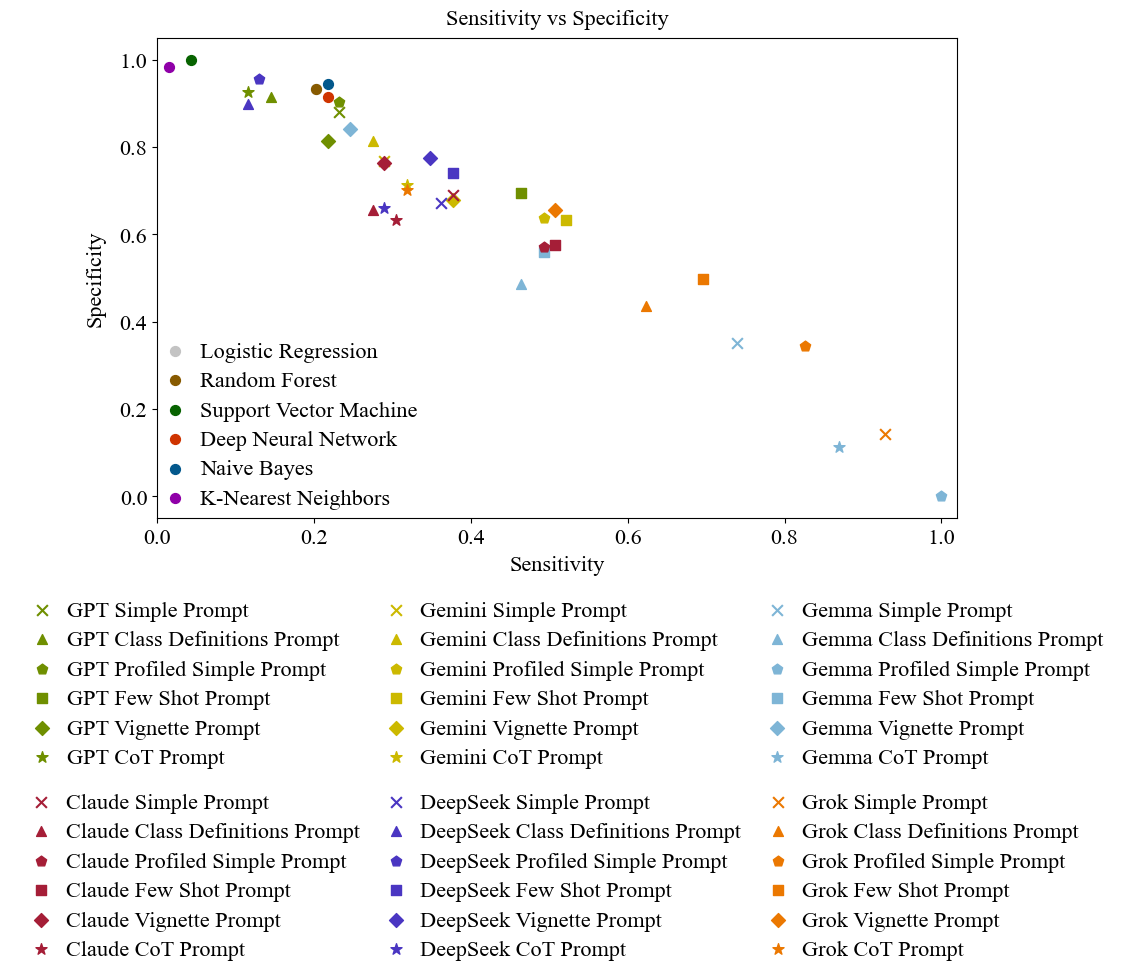

In [78]:
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 16

alpha = 0.8
fig = plt.figure(figsize = (10*alpha, 6*alpha))
ax = fig.add_axes([0, 0.13, 1, 1])

ax.scatter(metrics_GPT_o3_simple_prompt["sensitivity"], metrics_GPT_o3_simple_prompt["specificity"], label="GPT Simple Prompt", color=LLM_colors[0], marker="x", s=60)
ax.scatter(metrics_GPT_o3_class_definitions_prompt["sensitivity"], metrics_GPT_o3_class_definitions_prompt["specificity"], label="GPT Class Definitions Prompt", color=LLM_colors[0], marker="^", s=50)
ax.scatter(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], metrics_GPT_o3_profiled_simple_prompt["specificity"], label="GPT Profiled Simple Prompt", color=LLM_colors[0], marker="p", s=60)
ax.scatter(metrics_GPT_o3_few_shot_prompt["sensitivity"], metrics_GPT_o3_few_shot_prompt["specificity"], label="GPT Few Shot Prompt", color=LLM_colors[0], marker="s", s=50)
ax.scatter(metrics_GPT_o3_vignette_prompt["sensitivity"], metrics_GPT_o3_vignette_prompt["specificity"], label="GPT Vignette Prompt", color=LLM_colors[0], marker="D", s=50)
ax.scatter(metrics_GPT_o3_cot_prompt["sensitivity"], metrics_GPT_o3_cot_prompt["specificity"], label="GPT CoT Prompt", color=LLM_colors[0], marker="*", s=70)

ax.scatter(metrics_Gemini_simple_prompt["sensitivity"], metrics_Gemini_simple_prompt["specificity"], label="Gemini Simple Prompt", color=LLM_colors[1], marker="x", s=60)
ax.scatter(metrics_Gemini_class_def_prompt["sensitivity"], metrics_Gemini_class_def_prompt["specificity"], label="Gemini Class Definitions Prompt", color=LLM_colors[1], marker="^", s=50)
ax.scatter(metrics_Gemini_profiled_simple_prompt["sensitivity"], metrics_Gemini_profiled_simple_prompt["specificity"], label="Gemini Profiled Simple Prompt", color=LLM_colors[1], marker="p", s=60)
ax.scatter(metrics_Gemini_few_shot_prompt["sensitivity"], metrics_Gemini_few_shot_prompt["specificity"], label="Gemini Few Shot Prompt", color=LLM_colors[1], marker="s", s=50)
ax.scatter(metrics_Gemini_vignette_prompt["sensitivity"], metrics_Gemini_vignette_prompt["specificity"], label="Gemini Vignette Prompt", color=LLM_colors[1], marker="D", s=50)
ax.scatter(metrics_Gemini_cot_prompt["sensitivity"], metrics_Gemini_cot_prompt["specificity"], label="Gemini CoT Prompt", color=LLM_colors[1], marker="*", s=70)

ax.scatter(metrics_Gemma_simple_prompt["sensitivity"], metrics_Gemma_simple_prompt["specificity"], label="Gemma Simple Prompt", color=LLM_colors[2], marker="x", s=60)
ax.scatter(metrics_Gemma_class_def_prompt["sensitivity"], metrics_Gemma_class_def_prompt["specificity"], label="Gemma Class Definitions Prompt", color=LLM_colors[2], marker="^", s=50)
ax.scatter(metrics_Gemma_profiled_simple_prompt["sensitivity"], metrics_Gemma_profiled_simple_prompt["specificity"], label="Gemma Profiled Simple Prompt", color=LLM_colors[2], marker="p", s=60)
ax.scatter(metrics_Gemma_few_shot_prompt["sensitivity"], metrics_Gemma_few_shot_prompt["specificity"], label="Gemma Few Shot Prompt", color=LLM_colors[2], marker="s", s=50)
ax.scatter(metrics_Gemma_vignette_prompt["sensitivity"], metrics_Gemma_vignette_prompt["specificity"], label="Gemma Vignette Prompt", color=LLM_colors[2], marker="D", s=50)
ax.scatter(metrics_Gemma_cot_prompt["sensitivity"], metrics_Gemma_cot_prompt["specificity"], label="Gemma CoT Prompt", color=LLM_colors[2], marker="*", s=70)

ax.scatter(metrics_Claude_simple_prompt["sensitivity"], metrics_Claude_simple_prompt["specificity"], label="Claude Simple Prompt", color=LLM_colors[3], marker="x", s=60)
ax.scatter(metrics_Claude_class_def_prompt["sensitivity"], metrics_Claude_class_def_prompt["specificity"], label="Claude Class Definitions Prompt", color=LLM_colors[3], marker="^", s=50)
ax.scatter(metrics_Claude_profiled_simple_prompt["sensitivity"], metrics_Claude_profiled_simple_prompt["specificity"], label="Claude Profiled Simple Prompt", color=LLM_colors[3], marker="p", s=60)
ax.scatter(metrics_Claude_few_shot_prompt["sensitivity"], metrics_Claude_few_shot_prompt["specificity"], label="Claude Few Shot Prompt", color=LLM_colors[3], marker="s", s=50)
ax.scatter(metrics_Claude_vignette_prompt["sensitivity"], metrics_Claude_vignette_prompt["specificity"], label="Claude Vignette Prompt", color=LLM_colors[3], marker="D", s=50)
ax.scatter(metrics_Claude_cot_prompt["sensitivity"], metrics_Claude_cot_prompt["specificity"], label="Claude CoT Prompt", color=LLM_colors[3], marker="*", s=70)

ax.scatter(metrics_DeepSeek_simple_prompt["sensitivity"], metrics_DeepSeek_simple_prompt["specificity"], label="DeepSeek Simple Prompt", color=LLM_colors[4], marker="x", s=60)
ax.scatter(metrics_DeepSeek_class_def_prompt["sensitivity"], metrics_DeepSeek_class_def_prompt["specificity"], label="DeepSeek Class Definitions Prompt", color=LLM_colors[4], marker="^", s=50)
ax.scatter(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], metrics_DeepSeek_profiled_simple_prompt["specificity"], label="DeepSeek Profiled Simple Prompt", color=LLM_colors[4], marker="p", s=60)
ax.scatter(metrics_DeepSeek_few_shot_prompt["sensitivity"], metrics_DeepSeek_few_shot_prompt["specificity"], label="DeepSeek Few Shot Prompt", color=LLM_colors[4], marker="s", s=50)
ax.scatter(metrics_DeepSeek_vignette_prompt["sensitivity"], metrics_DeepSeek_vignette_prompt["specificity"], label="DeepSeek Vignette Prompt", color=LLM_colors[4], marker="D", s=50)
ax.scatter(metrics_DeepSeek_cot_prompt["sensitivity"], metrics_DeepSeek_cot_prompt["specificity"], label="DeepSeek CoT Prompt", color=LLM_colors[4], marker="*", s=70)

ax.scatter(metrics_Grok_simple_prompt["sensitivity"], metrics_Grok_simple_prompt["specificity"], label="Grok Simple Prompt", color=LLM_colors[5], marker="x", s=60)
ax.scatter(metrics_Grok_class_def_prompt["sensitivity"], metrics_Grok_class_def_prompt["specificity"], label="Grok Class Definitions Prompt", color=LLM_colors[5], marker="^", s=50)
ax.scatter(metrics_Grok_profiled_simple_prompt["sensitivity"], metrics_Grok_profiled_simple_prompt["specificity"], label="Grok Profiled Simple Prompt", color=LLM_colors[5], marker="p", s=60)
ax.scatter(metrics_Grok_few_shot_prompt["sensitivity"], metrics_Grok_few_shot_prompt["specificity"], label="Grok Few Shot Prompt", color=LLM_colors[5], marker="s", s=50)
ax.scatter(metrics_Grok_vignette_prompt["sensitivity"], metrics_Grok_vignette_prompt["specificity"], label="Grok Vignette Prompt", color=LLM_colors[5], marker="D", s=50)
ax.scatter(metrics_Grok_cot_prompt["sensitivity"], metrics_Grok_cot_prompt["specificity"], label="Grok CoT Prompt", color=LLM_colors[5], marker="*", s=70)

ax.scatter(metrics_lr["sensitivity"], metrics_lr["specificity"], label="Logistic Regression", color=ML_colors[0], s=50)
ax.scatter(metrics_rf["sensitivity"], metrics_rf["specificity"], label="Random Forest", color=ML_colors[1], s=50)
ax.scatter(metrics_svc["sensitivity"], metrics_svc["specificity"], label="Support Vector Machine", color=ML_colors[2], s=50)
ax.scatter(metrics_dnn["sensitivity"], metrics_dnn["specificity"], label="Deep Neural Network", color=ML_colors[3], s=50)
ax.scatter(metrics_nb["sensitivity"], metrics_nb["specificity"], label="Naive Bayes", color=ML_colors[4], s=50)
ax.scatter(metrics_knn["sensitivity"], metrics_knn["specificity"], label="K-Nearest Neighbors", color=ML_colors[5], s=50)

ax.set_xlim(0, 1.02)
ax.set_xlabel("Sensitivity", labelpad=5)
ax.set_ylabel("Specificity", labelpad=10)
ax.set_title("Sensitivity vs Specificity", fontsize=16, pad=10)

handles, labels = ax.get_legend_handles_labels()

split = 6
handles1, labels1 = handles[:split], labels[:split]
handles2, labels2 = handles[split:2*split], labels[split:2*split]
handles3, labels3 = handles[2*split:3*split], labels[2*split:3*split]
handles4, labels4 = handles[3*split:4*split], labels[3*split:4*split]
handles5, labels5 = handles[4*split:5*split], labels[4*split:5*split]
handles6, labels6 = handles[5*split:6*split], labels[5*split:6*split]
handles7, labels7 = handles[6*split:7*split], labels[6*split:7*split]

fig.legend(
    handles1, labels1,
    loc='upper center',
    bbox_to_anchor=(0.028, 0),
    ncol=1,
    frameon=False,
    columnspacing = 0.5,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles2, labels2,
    loc='upper center',
    bbox_to_anchor=(0.486, 0),
    ncol=1,
    frameon=False,
    columnspacing = 0.1,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles3, labels3,
    loc='upper center',
    bbox_to_anchor=(0.965, 0),
    ncol=1,
    frameon=False,
    columnspacing = 0.1,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles4, labels4,
    loc='upper center',
    bbox_to_anchor=(0.04, -0.40),
    ncol=1,
    frameon=False,
    columnspacing = 0.1,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles5, labels5,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.40),
    ncol=1,
    frameon=False,
    columnspacing = 0.1,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles6, labels6,
    loc='upper center',
    bbox_to_anchor=(0.95, -0.40),
    ncol=1,
    frameon=False,
    columnspacing = 0.1,
    handletextpad = 0.1,
    labelspacing = 0.4
)

fig.legend(
    handles7, labels7,
    loc='upper left',
    bbox_to_anchor=(-0.03, 0.54),
    ncol=1,
    frameon=False,
    columnspacing=0.1,
    handletextpad=0.1,
    borderaxespad=0.5,
    labelspacing = 0.4
)


# Save
plt.savefig("../doc/figs/01_LLM_ML_performance/sensitivity_specificity_all_models.png", dpi=300, bbox_inches="tight")
plt.show()

## Unification Approaches

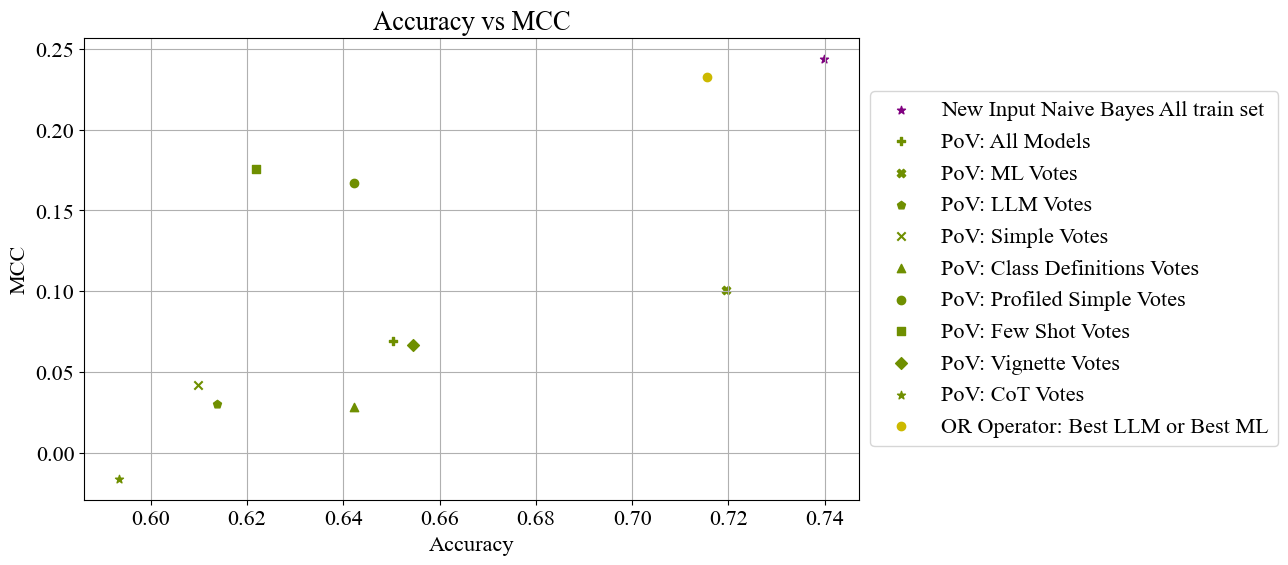

In [62]:
# plot all unification approaches: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_new_input_nb["accuracy"], metrics_new_input_nb["mcc"], label = "New Input Naive Bayes All train set", color = "purple", marker = "*")

plt.scatter(metrics_pov_all_models["accuracy"], metrics_pov_all_models["mcc"], label = "PoV: All Models", color = LLM_colors[0], marker = "P")
plt.scatter(metrics_pov_ml_votes["accuracy"], metrics_pov_ml_votes["mcc"], label = "PoV: ML Votes", color = LLM_colors[0], marker = "X")
plt.scatter(metrics_pov_llm_votes["accuracy"], metrics_pov_llm_votes["mcc"], label = "PoV: LLM Votes", color = LLM_colors[0], marker = "p")
plt.scatter(metrics_pov_simple_votes["accuracy"], metrics_pov_simple_votes["mcc"], label = "PoV: Simple Votes", color = LLM_colors[0], marker = "x")
plt.scatter(metrics_pov_class_definitions_votes["accuracy"], metrics_pov_class_definitions_votes["mcc"], label = "PoV: Class Definitions Votes", color = LLM_colors[0], marker = "^")
plt.scatter(metrics_pov_profiled_simple_votes["accuracy"], metrics_pov_profiled_simple_votes["mcc"], label = "PoV: Profiled Simple Votes", color = LLM_colors[0], marker = "o")
plt.scatter(metrics_pov_few_shot_votes["accuracy"], metrics_pov_few_shot_votes["mcc"], label = "PoV: Few Shot Votes", color = LLM_colors[0], marker = "s")
plt.scatter(metrics_pov_vignette_votes["accuracy"], metrics_pov_vignette_votes["mcc"], label = "PoV: Vignette Votes", color = LLM_colors[0], marker = "D")
plt.scatter(metrics_pov_cot_votes["accuracy"], metrics_pov_cot_votes["mcc"], label = "PoV: CoT Votes", color = LLM_colors[0], marker = "*")

plt.scatter(metrics_best_LLM_or_best_ML["accuracy"], metrics_best_LLM_or_best_ML["mcc"], label = "OR Operator: Best LLM or Best ML", color = LLM_colors[1], marker = "o")

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
plt.savefig("../doc/figs/02_unification_performance/accuracy_mcc_unification.png", dpi = 300, bbox_inches = "tight")

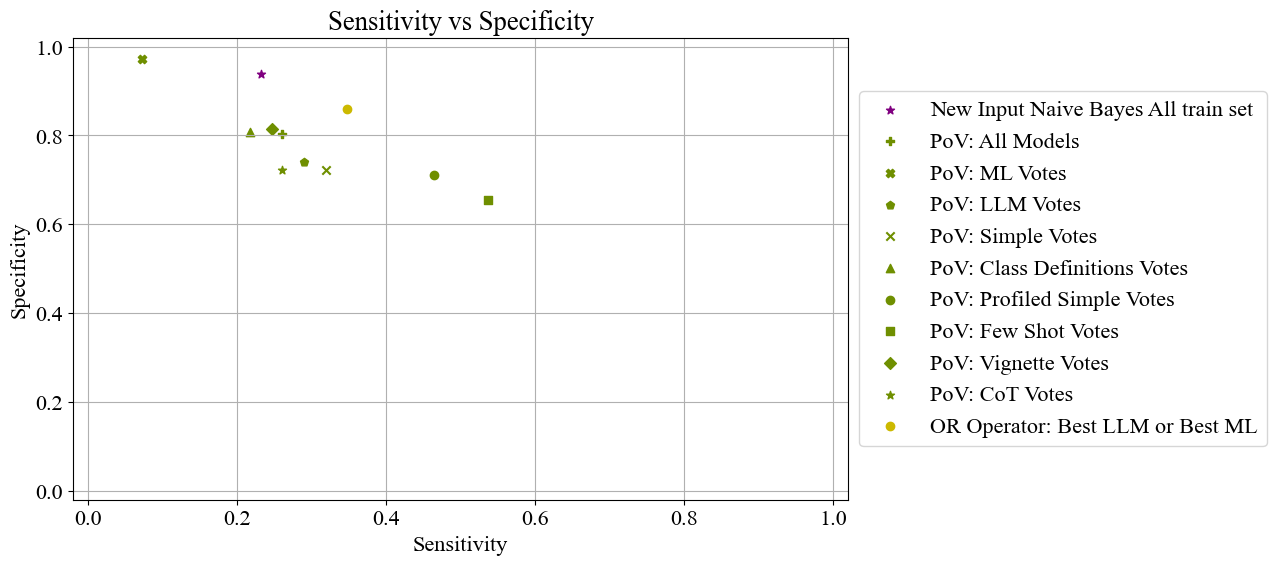

In [63]:
# plot sensitivity vs specificity for all unification approaches
plt.figure(figsize = (10, 6))

plt.scatter(metrics_new_input_nb["sensitivity"], metrics_new_input_nb["specificity"], label = "New Input Naive Bayes All train set", color = "purple", marker = "*")

plt.scatter(metrics_pov_all_models["sensitivity"], metrics_pov_all_models["specificity"], label = "PoV: All Models", color = LLM_colors[0], marker = "P")
plt.scatter(metrics_pov_ml_votes["sensitivity"], metrics_pov_ml_votes["specificity"], label = "PoV: ML Votes", color = LLM_colors[0], marker = "X")
plt.scatter(metrics_pov_llm_votes["sensitivity"], metrics_pov_llm_votes["specificity"], label = "PoV: LLM Votes", color = LLM_colors[0], marker = "p")
plt.scatter(metrics_pov_simple_votes["sensitivity"], metrics_pov_simple_votes["specificity"], label = "PoV: Simple Votes", color = LLM_colors[0], marker = "x")
plt.scatter(metrics_pov_class_definitions_votes["sensitivity"], metrics_pov_class_definitions_votes["specificity"], label = "PoV: Class Definitions Votes", color = LLM_colors[0], marker = "^")
plt.scatter(metrics_pov_profiled_simple_votes["sensitivity"], metrics_pov_profiled_simple_votes["specificity"], label = "PoV: Profiled Simple Votes", color = LLM_colors[0], marker = "o")
plt.scatter(metrics_pov_few_shot_votes["sensitivity"], metrics_pov_few_shot_votes["specificity"], label = "PoV: Few Shot Votes", color = LLM_colors[0], marker = "s")
plt.scatter(metrics_pov_vignette_votes["sensitivity"], metrics_pov_vignette_votes["specificity"], label = "PoV: Vignette Votes", color = LLM_colors[0], marker = "D")
plt.scatter(metrics_pov_cot_votes["sensitivity"], metrics_pov_cot_votes["specificity"], label = "PoV: CoT Votes", color = LLM_colors[0], marker = "*")

plt.scatter(metrics_best_LLM_or_best_ML["sensitivity"], metrics_best_LLM_or_best_ML["specificity"], label = "OR Operator: Best LLM or Best ML", color = LLM_colors[1], marker = "o")

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
plt.savefig("../doc/figs/02_unification_performance/sensitivity_specificity_unification.png", dpi = 300, bbox_inches = "tight")

# 3 Print metrics

## ML Models

In [64]:
print(f"""Metrics for all ML models:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Logistic Regression | {round(metrics_lr["accuracy"], 2)} | {round(metrics_lr["mcc"], 2)} | {round(metrics_lr["sensitivity"], 2)} | {round(metrics_lr["specificity"], 2)} | {round(metrics_lr["precision"], 2)} | {round(metrics_lr["macro_f1"], 2)}
Random Forest       | {round(metrics_rf["accuracy"], 2)} | {round(metrics_rf["mcc"], 2)} | {round(metrics_rf["sensitivity"], 2)} | {round(metrics_rf["specificity"], 2)} | {round(metrics_rf["precision"], 2)} | {round(metrics_rf["macro_f1"], 2)}
Support Vector      | {round(metrics_svc["accuracy"], 2)} | {round(metrics_svc["mcc"], 2)} | {round(metrics_svc["sensitivity"], 2)} | {round(metrics_svc["specificity"], 2)} | {round(metrics_svc["precision"], 2)} | {round(metrics_svc["macro_f1"], 2)}
Deep Neural Net     | {round(metrics_dnn["accuracy"], 2)} | {round(metrics_dnn["mcc"], 2)} | {round(metrics_dnn["sensitivity"], 2)} | {round(metrics_dnn["specificity"], 2)} | {round(metrics_dnn["precision"], 2)} | {round(metrics_dnn["macro_f1"], 2)}
Naive Bayes         | {round(metrics_nb["accuracy"], 2)} | {round(metrics_nb["mcc"], 2)} | {round(metrics_nb["sensitivity"], 2)} | {round(metrics_nb["specificity"], 2)} | {round(metrics_nb["precision"], 2)} | {round(metrics_nb["macro_f1"], 2)}
K-Nearest Neighb    | {round(metrics_knn["accuracy"], 2)} | {round(metrics_knn["mcc"], 2)} | {round(metrics_knn["sensitivity"], 2)} | {round(metrics_knn["specificity"], 2)} | {round(metrics_knn["precision"], 2)} | {round(metrics_knn["macro_f1"], 2)}
""")

Metrics for all ML models:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Logistic Regression | 0.73 | 0.2 | 0.2 | 0.93 | 0.54 | 0.57
Random Forest       | 0.73 | 0.2 | 0.2 | 0.93 | 0.54 | 0.57
Support Vector      | 0.73 | 0.18 | 0.04 | 1.0 | 1.0 | 0.52
Deep Neural Net     | 0.72 | 0.18 | 0.22 | 0.92 | 0.5 | 0.57
Naive Bayes         | 0.74 | 0.24 | 0.22 | 0.94 | 0.6 | 0.58
K-Nearest Neighb    | 0.71 | -0.01 | 0.01 | 0.98 | 0.25 | 0.5



## LLMs

In [65]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_simple_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_simple_prompt["mcc"], 2)} | {round(metrics_GPT_o3_simple_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_simple_prompt["specificity"], 2)} | {round(metrics_GPT_o3_simple_prompt["precision"], 2)} | {round(metrics_GPT_o3_simple_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_simple_prompt["accuracy"], 2)} | {round(metrics_Gemini_simple_prompt["mcc"], 2)} | {round(metrics_Gemini_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemini_simple_prompt["specificity"], 2)} | {round(metrics_Gemini_simple_prompt["precision"], 2)} | {round(metrics_Gemini_simple_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_simple_prompt["accuracy"], 2)} | {round(metrics_Gemma_simple_prompt["mcc"], 2)} | {round(metrics_Gemma_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemma_simple_prompt["specificity"], 2)} | {round(metrics_Gemma_simple_prompt["precision"], 2)} | {round(metrics_Gemma_simple_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_simple_prompt["accuracy"], 2)} | {round(metrics_Claude_simple_prompt["mcc"], 2)} | {round(metrics_Claude_simple_prompt["sensitivity"], 2)} | {round(metrics_Claude_simple_prompt["specificity"], 2)} | {round(metrics_Claude_simple_prompt["precision"], 2)} | {round(metrics_Claude_simple_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_simple_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_simple_prompt["mcc"], 2)} | {round(metrics_DeepSeek_simple_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_simple_prompt["specificity"], 2)} | {round(metrics_DeepSeek_simple_prompt["precision"], 2)} | {round(metrics_DeepSeek_simple_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_simple_prompt["accuracy"], 2)} | {round(metrics_Grok_simple_prompt["mcc"], 2)} | {round(metrics_Grok_simple_prompt["sensitivity"], 2)} | {round(metrics_Grok_simple_prompt["specificity"], 2)} | {round(metrics_Grok_simple_prompt["precision"], 2)} | {round(metrics_Grok_simple_prompt["macro_f1"], 2)}
""")

Metrics for all simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.7 | 0.14 | 0.23 | 0.88 | 0.43 | 0.56
Gemini | 0.63 | 0.06 | 0.29 | 0.77 | 0.33 | 0.53
Gemma  | 0.46 | 0.09 | 0.74 | 0.35 | 0.31 | 0.54
Claude | 0.6 | 0.06 | 0.38 | 0.69 | 0.32 | 0.53
DeepS  | 0.59 | 0.03 | 0.36 | 0.67 | 0.3 | 0.52
Grok   | 0.36 | 0.09 | 0.93 | 0.14 | 0.3 | 0.53



In [66]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all class definition prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_class_definitions_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["mcc"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["specificity"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["precision"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_class_def_prompt["accuracy"], 2)} | {round(metrics_Gemini_class_def_prompt["mcc"], 2)} | {round(metrics_Gemini_class_def_prompt["sensitivity"], 2)} | {round(metrics_Gemini_class_def_prompt["specificity"], 2)} | {round(metrics_Gemini_class_def_prompt["precision"], 2)} | {round(metrics_Gemini_class_def_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_class_def_prompt["accuracy"], 2)} | {round(metrics_Gemma_class_def_prompt["mcc"], 2)} | {round(metrics_Gemma_class_def_prompt["sensitivity"], 2)} | {round(metrics_Gemma_class_def_prompt["specificity"], 2)} | {round(metrics_Gemma_class_def_prompt["precision"], 2)} | {round(metrics_Gemma_class_def_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_class_def_prompt["accuracy"], 2)} | {round(metrics_Claude_class_def_prompt["mcc"], 2)} | {round(metrics_Claude_class_def_prompt["sensitivity"], 2)} | {round(metrics_Claude_class_def_prompt["specificity"], 2)} | {round(metrics_Claude_class_def_prompt["precision"], 2)} | {round(metrics_Claude_class_def_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_class_def_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_class_def_prompt["mcc"], 2)} | {round(metrics_DeepSeek_class_def_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_class_def_prompt["specificity"], 2)} | {round(metrics_DeepSeek_class_def_prompt["precision"], 2)} | {round(metrics_DeepSeek_class_def_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_class_def_prompt["accuracy"], 2)} | {round(metrics_Grok_class_def_prompt["mcc"], 2)} | {round(metrics_Grok_class_def_prompt["sensitivity"], 2)} | {round(metrics_Grok_class_def_prompt["specificity"], 2)} | {round(metrics_Grok_class_def_prompt["precision"], 2)} | {round(metrics_Grok_class_def_prompt["macro_f1"], 2)}
""")

Metrics for all class definition prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.7 | 0.09 | 0.14 | 0.92 | 0.4 | 0.53
Gemini | 0.66 | 0.1 | 0.28 | 0.81 | 0.37 | 0.54
Gemma  | 0.48 | -0.05 | 0.46 | 0.49 | 0.26 | 0.47
Claude | 0.55 | -0.07 | 0.28 | 0.66 | 0.24 | 0.47
DeepS  | 0.68 | 0.02 | 0.12 | 0.9 | 0.31 | 0.51
Grok   | 0.49 | 0.05 | 0.62 | 0.44 | 0.3 | 0.53



In [67]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all profiled simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["mcc"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["specificity"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["precision"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["precision"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["precision"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Claude_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Claude_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Claude_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Claude_profiled_simple_prompt["precision"], 2)} | {round(metrics_Claude_profiled_simple_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["mcc"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["specificity"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["precision"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Grok_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Grok_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Grok_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Grok_profiled_simple_prompt["precision"], 2)} | {round(metrics_Grok_profiled_simple_prompt["macro_f1"], 2)}
""")

Metrics for all profiled simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.72 | 0.18 | 0.23 | 0.9 | 0.48 | 0.57
Gemini | 0.6 | 0.12 | 0.49 | 0.64 | 0.35 | 0.57
Gemma  | 0.28 | 0.0 | 1.0 | 0.0 | 0.28 | 0.5
Claude | 0.55 | 0.06 | 0.49 | 0.57 | 0.31 | 0.53
DeepS  | 0.72 | 0.15 | 0.13 | 0.95 | 0.53 | 0.54
Grok   | 0.48 | 0.17 | 0.83 | 0.34 | 0.33 | 0.59



In [68]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all few shot prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_few_shot_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["mcc"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["specificity"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["precision"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_few_shot_prompt["accuracy"], 2)} | {round(metrics_Gemini_few_shot_prompt["mcc"], 2)} | {round(metrics_Gemini_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Gemini_few_shot_prompt["specificity"], 2)} | {round(metrics_Gemini_few_shot_prompt["precision"], 2)} | {round(metrics_Gemini_few_shot_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_few_shot_prompt["accuracy"], 2)} | {round(metrics_Gemma_few_shot_prompt["mcc"], 2)} | {round(metrics_Gemma_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Gemma_few_shot_prompt["specificity"], 2)} | {round(metrics_Gemma_few_shot_prompt["precision"], 2)} | {round(metrics_Gemma_few_shot_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_few_shot_prompt["accuracy"], 2)} | {round(metrics_Claude_few_shot_prompt["mcc"], 2)} | {round(metrics_Claude_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Claude_few_shot_prompt["specificity"], 2)} | {round(metrics_Claude_few_shot_prompt["precision"], 2)} | {round(metrics_Claude_few_shot_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_few_shot_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["mcc"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["specificity"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["precision"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_few_shot_prompt["accuracy"], 2)} | {round(metrics_Grok_few_shot_prompt["mcc"], 2)} | {round(metrics_Grok_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Grok_few_shot_prompt["specificity"], 2)} | {round(metrics_Grok_few_shot_prompt["precision"], 2)} | {round(metrics_Grok_few_shot_prompt["macro_f1"], 2)}
""")

Metrics for all few shot prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.63 | 0.15 | 0.46 | 0.69 | 0.37 | 0.58
Gemini | 0.6 | 0.14 | 0.52 | 0.63 | 0.36 | 0.58
Gemma  | 0.54 | 0.05 | 0.49 | 0.56 | 0.3 | 0.53
Claude | 0.56 | 0.08 | 0.51 | 0.58 | 0.32 | 0.54
DeepS  | 0.64 | 0.12 | 0.38 | 0.74 | 0.36 | 0.56
Grok   | 0.55 | 0.17 | 0.7 | 0.5 | 0.35 | 0.6



In [69]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all vignette prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_vignette_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_vignette_prompt["mcc"], 2)} | {round(metrics_GPT_o3_vignette_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_vignette_prompt["specificity"], 2)} | {round(metrics_GPT_o3_vignette_prompt["precision"], 2)} | {round(metrics_GPT_o3_vignette_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_vignette_prompt["accuracy"], 2)} | {round(metrics_Gemini_vignette_prompt["mcc"], 2)} | {round(metrics_Gemini_vignette_prompt["sensitivity"], 2)} | {round(metrics_Gemini_vignette_prompt["specificity"], 2)} | {round(metrics_Gemini_vignette_prompt["precision"], 2)} | {round(metrics_Gemini_vignette_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_vignette_prompt["accuracy"], 2)} | {round(metrics_Gemma_vignette_prompt["mcc"], 2)} | {round(metrics_Gemma_vignette_prompt["sensitivity"], 2)} | {round(metrics_Gemma_vignette_prompt["specificity"], 2)} | {round(metrics_Gemma_vignette_prompt["precision"], 2)} | {round(metrics_Gemma_vignette_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_vignette_prompt["accuracy"], 2)} | {round(metrics_Claude_vignette_prompt["mcc"], 2)} | {round(metrics_Claude_vignette_prompt["sensitivity"], 2)} | {round(metrics_Claude_vignette_prompt["specificity"], 2)} | {round(metrics_Claude_vignette_prompt["precision"], 2)} | {round(metrics_Claude_vignette_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_vignette_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_vignette_prompt["mcc"], 2)} | {round(metrics_DeepSeek_vignette_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_vignette_prompt["specificity"], 2)} | {round(metrics_DeepSeek_vignette_prompt["precision"], 2)} | {round(metrics_DeepSeek_vignette_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_vignette_prompt["accuracy"], 2)} | {round(metrics_Grok_vignette_prompt["mcc"], 2)} | {round(metrics_Grok_vignette_prompt["sensitivity"], 2)} | {round(metrics_Grok_vignette_prompt["specificity"], 2)} | {round(metrics_Grok_vignette_prompt["precision"], 2)} | {round(metrics_Grok_vignette_prompt["macro_f1"], 2)}
""")

Metrics for all vignette prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.65 | 0.04 | 0.22 | 0.81 | 0.31 | 0.52
Gemini | 0.59 | 0.05 | 0.38 | 0.68 | 0.31 | 0.53
Gemma  | 0.67 | 0.1 | 0.25 | 0.84 | 0.38 | 0.54
Claude | 0.63 | 0.05 | 0.29 | 0.76 | 0.32 | 0.53
DeepS  | 0.65 | 0.12 | 0.35 | 0.77 | 0.38 | 0.56
Grok   | 0.61 | 0.15 | 0.51 | 0.66 | 0.36 | 0.58



In [70]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all CoT prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_cot_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_cot_prompt["mcc"], 2)} | {round(metrics_GPT_o3_cot_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_cot_prompt["specificity"], 2)} | {round(metrics_GPT_o3_cot_prompt["precision"], 2)} | {round(metrics_GPT_o3_cot_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_cot_prompt["accuracy"], 2)} | {round(metrics_Gemini_cot_prompt["mcc"], 2)} | {round(metrics_Gemini_cot_prompt["sensitivity"], 2)} | {round(metrics_Gemini_cot_prompt["specificity"], 2)} | {round(metrics_Gemini_cot_prompt["precision"], 2)} | {round(metrics_Gemini_cot_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_cot_prompt["accuracy"], 2)} | {round(metrics_Gemma_cot_prompt["mcc"], 2)} | {round(metrics_Gemma_cot_prompt["sensitivity"], 2)} | {round(metrics_Gemma_cot_prompt["specificity"], 2)} | {round(metrics_Gemma_cot_prompt["precision"], 2)} | {round(metrics_Gemma_cot_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_cot_prompt["accuracy"], 2)} | {round(metrics_Claude_cot_prompt["mcc"], 2)} | {round(metrics_Claude_cot_prompt["sensitivity"], 2)} | {round(metrics_Claude_cot_prompt["specificity"], 2)} | {round(metrics_Claude_cot_prompt["precision"], 2)} | {round(metrics_Claude_cot_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_cot_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_cot_prompt["mcc"], 2)} | {round(metrics_DeepSeek_cot_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_cot_prompt["specificity"], 2)} | {round(metrics_DeepSeek_cot_prompt["precision"], 2)} | {round(metrics_DeepSeek_cot_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_cot_prompt["accuracy"], 2)} | {round(metrics_Grok_cot_prompt["mcc"], 2)} | {round(metrics_Grok_cot_prompt["sensitivity"], 2)} | {round(metrics_Grok_cot_prompt["specificity"], 2)} | {round(metrics_Grok_cot_prompt["precision"], 2)} | {round(metrics_Grok_cot_prompt["macro_f1"], 2)}
""")

Metrics for all CoT prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.7 | 0.07 | 0.12 | 0.93 | 0.38 | 0.52
Gemini | 0.6 | 0.03 | 0.32 | 0.71 | 0.3 | 0.52
Gemma  | 0.33 | -0.02 | 0.87 | 0.11 | 0.28 | 0.49
Claude | 0.54 | -0.06 | 0.3 | 0.63 | 0.24 | 0.47
DeepS  | 0.56 | -0.05 | 0.29 | 0.66 | 0.25 | 0.48
Grok   | 0.59 | 0.02 | 0.32 | 0.7 | 0.29 | 0.51



In [71]:
def average_prompt_metrics(metrics_GPT, metrics_Gemini, metrics_Gemma, metrics_Claude, metrics_DeepSeek, metrics_Grok):
    accuracy = np.mean([
            metrics_GPT["accuracy"],
            metrics_Gemini["accuracy"],
            metrics_Gemma["accuracy"],
            metrics_Claude["accuracy"],
            metrics_DeepSeek["accuracy"],
            metrics_Grok["accuracy"]
    ])

    mcc = np.mean([
            metrics_GPT["mcc"],
            metrics_Gemini["mcc"],
            metrics_Gemma["mcc"],
            metrics_Claude["mcc"],
            metrics_DeepSeek["mcc"],
            metrics_Grok["mcc"]
    ])

    sensitivity = np.mean([
            metrics_GPT["sensitivity"],
            metrics_Gemini["sensitivity"],
            metrics_Gemma["sensitivity"],
            metrics_Claude["sensitivity"],
            metrics_DeepSeek["sensitivity"],
            metrics_Grok["sensitivity"]
    ])

    specificity = np.mean([
            metrics_GPT["specificity"],
            metrics_Gemini["specificity"],
            metrics_Gemma["specificity"],
            metrics_Claude["specificity"],
            metrics_DeepSeek["specificity"],
            metrics_Grok["specificity"]
    ])

    precision = np.mean([
            metrics_GPT["precision"],
            metrics_Gemini["precision"],
            metrics_Gemma["precision"],
            metrics_Claude["precision"],
            metrics_DeepSeek["precision"],
            metrics_Grok["precision"]
    ])

    macro_f1 = np.mean([
            metrics_GPT["macro_f1"],
            metrics_Gemini["macro_f1"],
            metrics_Gemma["macro_f1"],
            metrics_Claude["macro_f1"],
            metrics_DeepSeek["macro_f1"],
            metrics_Grok["macro_f1"]
    ])

    return accuracy, mcc, sensitivity, specificity, precision, macro_f1

In [72]:
def average_LLM_metrics(metrics_simple, metrics_class_def, metrics_profiled_simple, metrics_few_shot, metrics_vignette, metrics_cot):
    accuracy = np.mean([
        metrics_simple["accuracy"],
        metrics_class_def["accuracy"],
        metrics_profiled_simple["accuracy"],
        metrics_few_shot["accuracy"],
        metrics_vignette["accuracy"],
        metrics_cot["accuracy"]
    ])

    mcc = np.mean([
        metrics_simple["mcc"],
        metrics_class_def["mcc"],
        metrics_profiled_simple["mcc"],
        metrics_few_shot["mcc"],
        metrics_vignette["mcc"],
        metrics_cot["mcc"]
    ])

    sensitivity = np.mean([
        metrics_simple["sensitivity"],
        metrics_class_def["sensitivity"],
        metrics_profiled_simple["sensitivity"],
        metrics_few_shot["sensitivity"],
        metrics_vignette["sensitivity"],
        metrics_cot["sensitivity"]
    ])

    specificity = np.mean([
        metrics_simple["specificity"],
        metrics_class_def["specificity"],
        metrics_profiled_simple["specificity"],
        metrics_few_shot["specificity"],
        metrics_vignette["specificity"],
        metrics_cot["specificity"]
    ])

    precision = np.mean([
        metrics_simple["precision"],
        metrics_class_def["precision"],
        metrics_profiled_simple["precision"],
        metrics_few_shot["precision"],
        metrics_vignette["precision"],
        metrics_cot["precision"]
    ])

    macro_f1 = np.mean([
        metrics_simple["macro_f1"],
        metrics_class_def["macro_f1"],
        metrics_profiled_simple["macro_f1"],
        metrics_few_shot["macro_f1"],
        metrics_vignette["macro_f1"],
        metrics_cot["macro_f1"]
    ])

    return accuracy, mcc, sensitivity, specificity, precision, macro_f1

In [73]:
average_simple_accuracy, average_simple_mcc, average_simple_sensitivity, average_simple_specificity, average_simple_precision, average_simple_f1 = average_prompt_metrics(
    metrics_GPT_o3_simple_prompt, metrics_Gemini_simple_prompt, metrics_Gemma_simple_prompt,
    metrics_Claude_simple_prompt, metrics_DeepSeek_simple_prompt, metrics_Grok_simple_prompt)

average_class_def_accuracy, average_class_def_mcc, average_class_def_sensitivity, average_class_def_specificity, average_class_def_precision, average_class_def_f1 = average_prompt_metrics(
    metrics_GPT_o3_class_definitions_prompt, metrics_Gemini_class_def_prompt, metrics_Gemma_class_def_prompt, metrics_Claude_class_def_prompt, metrics_DeepSeek_class_def_prompt, metrics_Grok_class_def_prompt)

average_profiled_simple_accuracy, average_profiled_simple_mcc, average_profiled_simple_sensitivity, average_profiled_simple_specificity, average_profiled_simple_precision, average_profiled_simple_f1 = average_prompt_metrics(
    metrics_GPT_o3_profiled_simple_prompt, metrics_Gemini_profiled_simple_prompt, metrics_Gemma_profiled_simple_prompt,
    metrics_Claude_profiled_simple_prompt, metrics_DeepSeek_profiled_simple_prompt, metrics_Grok_profiled_simple_prompt)

average_few_shot_accuracy, average_few_shot_mcc, average_few_shot_sensitivity, average_few_shot_specificity, average_few_shot_precision, average_few_shot_f1 = average_prompt_metrics(
    metrics_GPT_o3_few_shot_prompt, metrics_Gemini_few_shot_prompt, metrics_Gemma_few_shot_prompt,
    metrics_Claude_few_shot_prompt, metrics_DeepSeek_few_shot_prompt, metrics_Grok_few_shot_prompt)

average_vignette_accuracy, average_vignette_mcc, average_vignette_sensitivity, average_vignette_specificity, average_vignette_precision, average_vignette_f1 = average_prompt_metrics(
    metrics_GPT_o3_vignette_prompt, metrics_Gemini_vignette_prompt, metrics_Gemma_vignette_prompt,
    metrics_Claude_vignette_prompt, metrics_DeepSeek_vignette_prompt, metrics_Grok_vignette_prompt)

average_cot_accuracy, average_cot_mcc, average_cot_sensitivity, average_cot_specificity, average_cot_precision, average_cot_f1 = average_prompt_metrics(
    metrics_GPT_o3_cot_prompt, metrics_Gemini_cot_prompt, metrics_Gemma_cot_prompt,
    metrics_Claude_cot_prompt, metrics_DeepSeek_cot_prompt, metrics_Grok_cot_prompt)

In [74]:
print(f"""Average metrics for all prompts and LLMs:

Prompt | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Simple prompt    | {round(average_simple_accuracy, 2)} | {round(average_simple_mcc, 2)} | {round(average_simple_sensitivity, 2)} | {round(average_simple_specificity, 2)} | {round(average_simple_precision, 2)} | {round(average_simple_f1, 2)}
Class def prompt | {round(average_class_def_accuracy, 2)} | {round(average_class_def_mcc, 2)} | {round(average_class_def_sensitivity, 2)} | {round(average_class_def_specificity, 2)} | {round(average_class_def_precision, 2)} | {round(average_class_def_f1, 2)}
Profiled prompt  | {round(average_profiled_simple_accuracy, 2)} | {round(average_profiled_simple_mcc, 2)} | {round(average_profiled_simple_sensitivity, 2)} | {round(average_profiled_simple_specificity, 2)} | {round(average_profiled_simple_precision, 2)} | {round(average_profiled_simple_f1, 2)}
Few shot prompt  | {round(average_few_shot_accuracy, 2)} | {round(average_few_shot_mcc, 2)} | {round(average_few_shot_sensitivity, 2)} | {round(average_few_shot_specificity, 2)} | {round(average_few_shot_precision, 2)} | {round(average_few_shot_f1, 2)}
Vignette prompt  | {round(average_vignette_accuracy, 2)} | {round(average_vignette_mcc, 2)} | {round(average_vignette_sensitivity, 2)} | {round(average_vignette_specificity, 2)} | {round(average_vignette_precision, 2)} | {round(average_vignette_f1, 2)}
CoT prompt       | {round(average_cot_accuracy, 2)} | {round(average_cot_mcc, 2)} | {round(average_cot_sensitivity, 2)} | {round(average_cot_specificity, 2)} | {round(average_cot_precision, 2)} | {round(average_cot_f1, 2)}
""")

Average metrics for all prompts and LLMs:

Prompt | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Simple prompt    | 0.56 | 0.08 | 0.49 | 0.58 | 0.33 | 0.54
Class def prompt | 0.59 | 0.02 | 0.32 | 0.7 | 0.31 | 0.51
Profiled prompt  | 0.56 | 0.11 | 0.53 | 0.57 | 0.38 | 0.55
Few shot prompt  | 0.59 | 0.12 | 0.51 | 0.62 | 0.34 | 0.56
Vignette prompt  | 0.64 | 0.09 | 0.33 | 0.75 | 0.34 | 0.54
CoT prompt       | 0.55 | -0.0 | 0.37 | 0.62 | 0.29 | 0.5



In [75]:
average_GPT_o3_accuracy, average_GPT_o3_mcc, average_GPT_o3_sensitivity, average_GPT_o3_specificity, average_GPT_o3_precision, average_GPT_o3_f1 = average_LLM_metrics(
    metrics_GPT_o3_simple_prompt, metrics_GPT_o3_class_definitions_prompt, metrics_GPT_o3_profiled_simple_prompt,
    metrics_GPT_o3_few_shot_prompt, metrics_GPT_o3_vignette_prompt, metrics_GPT_o3_cot_prompt)

average_Gemini_accuracy, average_Gemini_mcc, average_Gemini_sensitivity, average_Gemini_specificity, average_Gemini_precision, average_Gemini_f1 = average_LLM_metrics(
    metrics_Gemini_simple_prompt, metrics_Gemini_class_def_prompt, metrics_Gemini_profiled_simple_prompt,
    metrics_Gemini_few_shot_prompt, metrics_Gemini_vignette_prompt, metrics_Gemini_cot_prompt)

average_Gemma_accuracy, average_Gemma_mcc, average_Gemma_sensitivity, average_Gemma_specificity, average_Gemma_precision, average_Gemma_f1 = average_LLM_metrics(
    metrics_Gemma_simple_prompt, metrics_Gemma_class_def_prompt, metrics_Gemma_profiled_simple_prompt,
    metrics_Gemma_few_shot_prompt, metrics_Gemma_vignette_prompt, metrics_Gemma_cot_prompt)

average_Claude_accuracy, average_Claude_mcc, average_Claude_sensitivity, average_Claude_specificity, average_Claude_precision, average_Claude_f1 = average_LLM_metrics(
    metrics_Claude_simple_prompt, metrics_Claude_class_def_prompt, metrics_Claude_profiled_simple_prompt,
    metrics_Claude_few_shot_prompt, metrics_Claude_vignette_prompt, metrics_Claude_cot_prompt)

average_DeepSeek_accuracy, average_DeepSeek_mcc, average_DeepSeek_sensitivity, average_DeepSeek_specificity, average_DeepSeek_precision, average_DeepSeek_f1 = average_LLM_metrics(
    metrics_DeepSeek_simple_prompt, metrics_DeepSeek_class_def_prompt, metrics_DeepSeek_profiled_simple_prompt,
    metrics_DeepSeek_few_shot_prompt, metrics_DeepSeek_vignette_prompt, metrics_DeepSeek_cot_prompt)

average_Grok_accuracy, average_Grok_mcc, average_Grok_sensitivity, average_Grok_specificity, average_Grok_precision, average_Grok_f1 = average_LLM_metrics(
    metrics_Grok_simple_prompt, metrics_Grok_class_def_prompt, metrics_Grok_profiled_simple_prompt,
    metrics_Grok_few_shot_prompt, metrics_Grok_vignette_prompt, metrics_Grok_cot_prompt)

In [76]:
print(f"""Average metrics for all LLMs:

LLM | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(average_GPT_o3_accuracy, 2)} | {round(average_GPT_o3_mcc, 2)} | {round(average_GPT_o3_sensitivity, 2)} | {round(average_GPT_o3_specificity, 2)} | {round(average_GPT_o3_precision, 2)} | {round(average_GPT_o3_f1, 2)}
Gemini | {round(average_Gemini_accuracy, 2)} | {round(average_Gemini_mcc, 2)} | {round(average_Gemini_sensitivity, 2)} | {round(average_Gemini_specificity, 2)} | {round(average_Gemini_precision, 2)} | {round(average_Gemini_f1, 2)}
Gemma  | {round(average_Gemma_accuracy, 2)} | {round(average_Gemma_mcc, 2)} | {round(average_Gemma_sensitivity, 2)} | {round(average_Gemma_specificity, 2)} | {round(average_Gemma_precision, 2)} | {round(average_Gemma_f1, 2)}
Claude | {round(average_Claude_accuracy, 2)} | {round(average_Claude_mcc, 2)} | {round(average_Claude_sensitivity, 2)} | {round(average_Claude_specificity, 2)} | {round(average_Claude_precision, 2)} | {round(average_Claude_f1, 2)}
DeepS  | {round(average_DeepSeek_accuracy, 2)} | {round(average_DeepSeek_mcc, 2)} | {round(average_DeepSeek_sensitivity, 2)} | {round(average_DeepSeek_specificity, 2)} | {round(average_DeepSeek_precision, 2)} | {round(average_DeepSeek_f1, 2)}
Grok   | {round(average_Grok_accuracy, 2)} | {round(average_Grok_mcc, 2)} | {round(average_Grok_sensitivity, 2)} | {round(average_Grok_specificity, 2)} | {round(average_Grok_precision, 2)} | {round(average_Grok_f1, 2)}
""")

Average metrics for all LLMs:

LLM | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.68 | 0.11 | 0.23 | 0.86 | 0.4 | 0.55
Gemini | 0.62 | 0.08 | 0.38 | 0.71 | 0.34 | 0.54
Gemma  | 0.46 | 0.03 | 0.64 | 0.39 | 0.3 | 0.51
Claude | 0.57 | 0.02 | 0.37 | 0.65 | 0.29 | 0.51
DeepS  | 0.64 | 0.07 | 0.27 | 0.78 | 0.35 | 0.53
Grok   | 0.51 | 0.11 | 0.65 | 0.46 | 0.32 | 0.56



## Unification Approaches

In [77]:
print(f"""Metrics for all Unification Approaches:

Method | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
New Input NB   | {round(metrics_new_input_nb["accuracy"], 2)} | {round(metrics_new_input_nb["mcc"], 2)} | {round(metrics_new_input_nb["sensitivity"], 2)} | {round(metrics_new_input_nb["specificity"], 2)} | {round(metrics_new_input_nb["precision"], 2)} | {round(metrics_new_input_nb["macro_f1"], 2)}
POV: All       | {round(metrics_pov_all_models["accuracy"], 2)} | {round(metrics_pov_all_models["mcc"], 2)} | {round(metrics_pov_all_models["sensitivity"], 2)} | {round(metrics_pov_all_models["specificity"], 2)} | {round(metrics_pov_all_models["precision"], 2)} | {round(metrics_pov_all_models["macro_f1"], 2)}
POV: ML        | {round(metrics_pov_ml_votes["accuracy"], 2)} | {round(metrics_pov_ml_votes["mcc"], 2)} | {round(metrics_pov_ml_votes["sensitivity"], 2)} | {round(metrics_pov_ml_votes["specificity"], 2)} | {round(metrics_pov_ml_votes["precision"], 2)} | {round(metrics_pov_ml_votes["macro_f1"], 2)}
POV: LLMs      | {round(metrics_pov_llm_votes["accuracy"], 2)} | {round(metrics_pov_llm_votes["mcc"], 2)} | {round(metrics_pov_llm_votes["sensitivity"], 2)} | {round(metrics_pov_llm_votes["specificity"], 2)} | {round(metrics_pov_llm_votes["precision"], 2)} | {round(metrics_pov_llm_votes["macro_f1"], 2)}
POV: Simple    | {round(metrics_pov_simple_votes["accuracy"], 2)} | {round(metrics_pov_simple_votes["mcc"], 2)} | {round(metrics_pov_simple_votes["sensitivity"], 2)} | {round(metrics_pov_simple_votes["specificity"], 2)} | {round(metrics_pov_simple_votes["precision"], 2)} | {round(metrics_pov_simple_votes["macro_f1"], 2)}
POV: Class Def | {round(metrics_pov_class_definitions_votes["accuracy"], 2)} | {round(metrics_pov_class_definitions_votes["mcc"], 2)} | {round(metrics_pov_class_definitions_votes["sensitivity"], 2)} | {round(metrics_pov_class_definitions_votes["specificity"], 2)} | {round(metrics_pov_class_definitions_votes["precision"], 2)} | {round(metrics_pov_class_definitions_votes["macro_f1"], 2)}
POV: Profiled  | {round(metrics_pov_profiled_simple_votes["accuracy"], 2)} | {round(metrics_pov_profiled_simple_votes["mcc"], 2)} | {round(metrics_pov_profiled_simple_votes["sensitivity"], 2)} | {round(metrics_pov_profiled_simple_votes["specificity"], 2)} | {round(metrics_pov_profiled_simple_votes["precision"], 2)} | {round(metrics_pov_profiled_simple_votes["macro_f1"], 2)}
POV: Few Shot  | {round(metrics_pov_few_shot_votes["accuracy"], 2)} | {round(metrics_pov_few_shot_votes["mcc"], 2)} | {round(metrics_pov_few_shot_votes["sensitivity"], 2)} | {round(metrics_pov_few_shot_votes["specificity"], 2)} | {round(metrics_pov_few_shot_votes["precision"], 2)} | {round(metrics_pov_few_shot_votes["macro_f1"], 2)}
POV: Vignette  | {round(metrics_pov_vignette_votes["accuracy"], 2)} | {round(metrics_pov_vignette_votes["mcc"], 2)} | {round(metrics_pov_vignette_votes["sensitivity"], 2)} | {round(metrics_pov_vignette_votes["specificity"], 2)} | {round(metrics_pov_vignette_votes["precision"], 2)} | {round(metrics_pov_vignette_votes["macro_f1"], 2)}
POV: CoT       | {round(metrics_pov_cot_votes["accuracy"], 2)} | {round(metrics_pov_cot_votes["mcc"], 2)} | {round(metrics_pov_cot_votes["sensitivity"], 2)} | {round(metrics_pov_cot_votes["specificity"], 2)} | {round(metrics_pov_cot_votes["precision"], 2)} | {round(metrics_pov_cot_votes["macro_f1"], 2)}
Best ML OR LLM | {round(metrics_best_LLM_or_best_ML["accuracy"], 2)} | {round(metrics_best_LLM_or_best_ML["mcc"], 2)} | {round(metrics_best_LLM_or_best_ML["sensitivity"], 2)} | {round(metrics_best_LLM_or_best_ML["specificity"], 2)} | {round(metrics_best_LLM_or_best_ML["precision"], 2)} | {round(metrics_best_LLM_or_best_ML["macro_f1"], 2)}
""")

Metrics for all Unification Approaches:

Method | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
New Input NB   | 0.74 | 0.24 | 0.23 | 0.94 | 0.59 | 0.58
POV: All       | 0.65 | 0.07 | 0.26 | 0.8 | 0.34 | 0.53
POV: ML        | 0.72 | 0.1 | 0.07 | 0.97 | 0.5 | 0.52
POV: LLMs      | 0.61 | 0.03 | 0.29 | 0.74 | 0.3 | 0.51
POV: Simple    | 0.61 | 0.04 | 0.32 | 0.72 | 0.31 | 0.52
POV: Class Def | 0.64 | 0.03 | 0.22 | 0.81 | 0.31 | 0.51
POV: Profiled  | 0.64 | 0.17 | 0.46 | 0.71 | 0.39 | 0.59
POV: Few Shot  | 0.62 | 0.18 | 0.54 | 0.66 | 0.38 | 0.6
POV: Vignette  | 0.65 | 0.07 | 0.25 | 0.81 | 0.34 | 0.53
POV: CoT       | 0.59 | -0.02 | 0.26 | 0.72 | 0.27 | 0.49
Best ML OR LLM | 0.72 | 0.23 | 0.35 | 0.86 | 0.49 | 0.6

